## 상관관계
- 두 변수간 관계성 강도 측정 통계 지표
- -1 < 0 < 1 (기준은 0.5 |0.5| 보다 크면 관계가 크다)
    * 1 : 양의 관계
    * 0 : 관계 없다
    * -1 : 음의 관계 
- 일종의 대표값

### 간단한 예제

In [1]:
import pandas as pd

In [2]:
# 두 변수 데이터 (예: 주식 A와 주식 B의 일간 수익률) 
data = { 
    'Stock_A': [0.02, 0.01, -0.01, 0.03, -0.02], 
    'Stock_B': [0.01, 0.03, -0.02, 0.04, -0.01] 
    }

In [4]:
data_df = pd.DataFrame(data)
data_df

,Stock_A,Stock_B
0,0.02,0.01
1,0.01,0.03
2,-0.01,-0.02
3,0.03,0.04
4,-0.02,-0.01


In [5]:
data_df.corr()

,Stock_A,Stock_B
Stock_A,1.00000,0.85118
Stock_B,0.85118,1.00000


In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

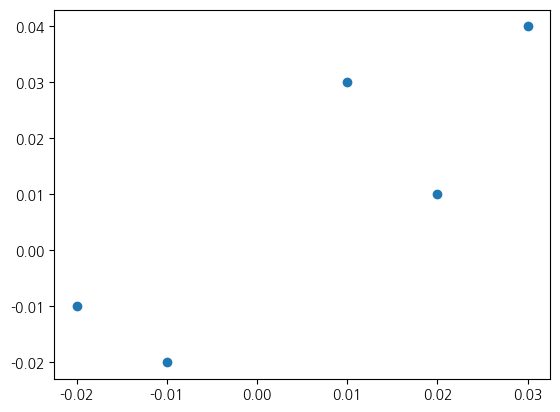

In [7]:
plt.scatter(data_df['Stock_A'],data_df['Stock_B'])
plt.show()

In [9]:
# 개별 종목 데이터: 국내외 심볼 혼합 
stocks = { 
    'S&P500': 'S&P500', 
    'AAPL': 'Apple (US)', # 애플 (미국)
    'MSFT': 'Microsoft (US)', # 마이크로소프트 (미국)
    '005930': 'Samsung (KR)', # 삼성전자 (한국)
    '000660': 'SK Hynix (KR)'   # SK하이닉스 (한국) 
    }

In [10]:
import FinanceDataReader as fdr

In [36]:
start_day = '2023'
sp500_df = fdr.DataReader('S&P500',start_day) # 499
msft_df = fdr.DataReader('MSFT',start_day) # 499
skhynix_df = fdr.DataReader('000660',start_day) # 488
samsung_df = fdr.DataReader('005930',start_day) # 488

In [17]:
skhynix_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 488 entries, 2023-01-02 to 2024-12-27
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    488 non-null    int64  
 1   High    488 non-null    int64  
 2   Low     488 non-null    int64  
 3   Close   488 non-null    int64  
 4   Volume  488 non-null    int64  
 5   Change  488 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 26.7 KB


In [20]:
sp500_df_close = sp500_df[['Close']].rename(columns={'Close': 'S&P500'})
sp500_df_close

,S&P500
2023-01-03,3824.139893
2023-01-04,3852.969971
2023-01-05,3808.100098
2023-01-06,3895.080078
2023-01-09,3892.090088
...,...
2024-12-19,5867.080078
2024-12-20,5930.850098
2024-12-23,5974.069824
2024-12-24,6040.040039


In [21]:
sp500_df_close = sp500_df[['Close']].rename(columns={'Close': 'S&P500'})
sp500_df_close

,S&P500
2023-01-03,3824.139893
2023-01-04,3852.969971
2023-01-05,3808.100098
2023-01-06,3895.080078
2023-01-09,3892.090088
...,...
2024-12-19,5867.080078
2024-12-20,5930.850098
2024-12-23,5974.069824
2024-12-24,6040.040039


In [22]:
msft_df_close = msft_df[['Close']].rename(columns={'Close': 'MSFT'})
msft_df_close

,MSFT
2023-01-03,239.580002
2023-01-04,229.100006
2023-01-05,222.309998
2023-01-06,224.929993
2023-01-09,227.119995
...,...
2024-12-19,437.029999
2024-12-20,436.600006
2024-12-23,435.250000
2024-12-24,439.329987


In [23]:
skhynix_df_close = skhynix_df[['Close']].rename(columns={'Close': 'SK_Hynix'})
skhynix_df_close

,SK_Hynix
Date,
2023-01-02,75700
2023-01-03,75600
2023-01-04,81000
2023-01-05,81400
2023-01-06,83100
...,...
2024-12-20,168500
2024-12-23,169600
2024-12-24,168500


In [38]:
samsung_df_close = samsung_df[['Close']].rename(columns={'Close': 'samsung'})
samsung_df_close

,samsung
Date,
2023-01-02,55500
2023-01-03,55400
2023-01-04,57800
2023-01-05,58200
2023-01-06,59000
...,...
2024-12-20,53000
2024-12-23,53500
2024-12-24,54400


In [39]:
df_corr = pd.concat([sp500_df_close, msft_df_close,skhynix_df_close,samsung_df_close], axis=1)
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 516 entries, 2023-01-02 to 2024-12-27
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S&P500    499 non-null    float64
 1   MSFT      499 non-null    float64
 2   SK_Hynix  488 non-null    float64
 3   samsung   488 non-null    float64
dtypes: float64(4)
memory usage: 20.2 KB


In [40]:
df_corr.dropna(inplace=True)
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 471 entries, 2023-01-03 to 2024-12-26
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S&P500    471 non-null    float64
 1   MSFT      471 non-null    float64
 2   SK_Hynix  471 non-null    float64
 3   samsung   471 non-null    float64
dtypes: float64(4)
memory usage: 18.4 KB


In [41]:
df_corr

,S&P500,MSFT,SK_Hynix,samsung
2023-01-03,3824.139893,239.580002,75600.0,55400.0
2023-01-04,3852.969971,229.100006,81000.0,57800.0
2023-01-05,3808.100098,222.309998,81400.0,58200.0
2023-01-06,3895.080078,224.929993,83100.0,59000.0
2023-01-09,3892.090088,227.119995,86000.0,60700.0
...,...,...,...,...
2024-12-19,5867.080078,437.029999,175000.0,53100.0
2024-12-20,5930.850098,436.600006,168500.0,53000.0
2024-12-23,5974.069824,435.250000,169600.0,53500.0
2024-12-24,6040.040039,439.329987,168500.0,54400.0


In [44]:
correlaiton_matrix = df_corr.corr()
correlaiton_matrix

,S&P500,MSFT,SK_Hynix,samsung
S&P500,1.000000,0.912200,0.889020,0.084073
MSFT,0.912200,1.000000,0.920752,0.390099
SK_Hynix,0.889020,0.920752,1.000000,0.427682
samsung,0.084073,0.390099,0.427682,1.000000


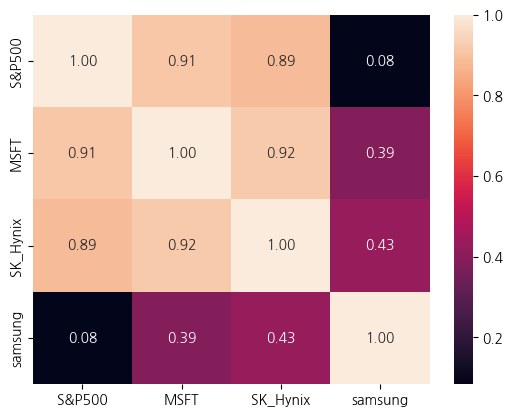

In [46]:
import seaborn as sns 
sns.heatmap(correlaiton_matrix, annot=True, fmt='.2f')
plt.show()